### NMF Tutorial

This tutorial requires a GPU attached. This tutorial is done with an NVIDIA P100.

In [1]:
import scanpy as sc
import sys
import os
import numpy as np
import pandas as pd

### Load and Process Dataset

* Take the generic 10x `pbmc` dataset built into `scanpy`. 

* Process this using `mudi`'s `process` module as shown below.

In [2]:
from mudi.process import recipe

adata = sc.datasets.pbmc3k()
adata = recipe(adata)

... storing 'batch' as categorical
... storing 'phase' as categorical


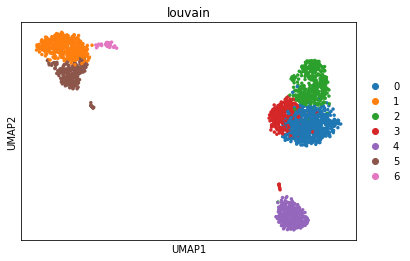

In [3]:
sc.pl.umap(adata, color='louvain')

### Import NMF Module

* Import `mudi`'s NMF module
* We will run the `NMF` wrapper function `inplace`, meaning we will edit the AnnData object directly

In [4]:
from mudi.nmf import NMF, get_uns

In [5]:
NMF(
    adata,
    K0=25, 
    objective='gaussian',
    phi=1,
    verbose=True,
    inplace=True
)

Using 1859 highly variable genes.
Filtering 0 mito genes.
Filtering 4 ribo genes.
NMF class initalized.
NMF data and parameters set.
%%%%%%%%%%%%%%%
a = 10.0
b = 0.6800444934818083
%%%%%%%%%%%%%%%
nit=0	objective=1820786.8	beta_div=540471.2	lambda=14.519603	del=0.9999029	K=25	sumW=62878.918	sumH=293.3935
nit=10	objective=1562295.8	beta_div=488501.78	lambda=6.652094	del=0.10942028	K=25	sumW=28399.668	sumH=533.24414
nit=20	objective=1403472.0	beta_div=462205.47	lambda=4.086198	del=0.10621047	K=25	sumW=16886.365	sumH=879.76685
nit=30	objective=1321556.2	beta_div=456263.5	lambda=2.8688903	del=0.0870836	K=25	sumW=11165.039	sumH=1303.3706
nit=40	objective=1218222.8	beta_div=455531.2	lambda=2.2291265	del=0.8700365	K=25	sumW=8258.467	sumH=1425.6906
nit=50	objective=1098747.2	beta_div=455510.44	lambda=1.8766887	del=0.20084171	K=17	sumW=6717.8086	sumH=1432.5393
nit=60	objective=1064436.9	beta_div=454992.53	lambda=1.6744733	del=0.14723971	K=16	sumW=5775.373	sumH=1494.933
nit=70	objective=1021481.

nit=720	objective=884519.75	beta_div=460402.7	lambda=0.9033517	del=0.00033038817	K=8	sumW=1956.613	sumH=1957.7726
nit=730	objective=884515.75	beta_div=460405.22	lambda=0.90310895	del=0.00032243005	K=8	sumW=1955.721	sumH=1957.6085
nit=740	objective=884512.0	beta_div=460407.8	lambda=0.90287036	del=0.00031360143	K=8	sumW=1954.8632	sumH=1957.4275
nit=750	objective=884508.75	beta_div=460410.4	lambda=0.90264034	del=0.00030389402	K=8	sumW=1954.0587	sumH=1957.2307
nit=760	objective=884505.5	beta_div=460412.8	lambda=0.9024229	del=0.00029389607	K=8	sumW=1953.32	sumH=1957.0239
nit=770	objective=884502.75	beta_div=460415.06	lambda=0.9022173	del=0.00028473602	K=8	sumW=1952.6378	sumH=1956.811
nit=780	objective=884499.9	beta_div=460417.22	lambda=0.90202	del=0.00027729257	K=8	sumW=1951.9978	sumH=1956.5923
nit=790	objective=884497.25	beta_div=460419.3	lambda=0.9018295	del=0.000270853	K=8	sumW=1951.3937	sumH=1956.3672
nit=800	objective=884494.5	beta_div=460421.44	lambda=0.9016454	del=0.00026489436	K=8	s

nit=1440	objective=884425.25	beta_div=460490.8	lambda=0.89595157	del=7.64526e-05	K=8	sumW=1938.9768	sumH=1943.2034
nit=1450	objective=884425.0	beta_div=460491.4	lambda=0.89590776	del=7.585066e-05	K=8	sumW=1938.9117	sumH=1943.0776
nit=1460	objective=884424.75	beta_div=460492.0	lambda=0.89586484	del=7.5026976e-05	K=8	sumW=1938.8491	sumH=1942.9534
nit=1470	objective=884424.4	beta_div=460492.66	lambda=0.8958229	del=7.442191e-05	K=8	sumW=1938.7893	sumH=1942.8308
nit=1480	objective=884423.75	beta_div=460493.2	lambda=0.89578223	del=7.3888965e-05	K=8	sumW=1938.7328	sumH=1942.7104
nit=1490	objective=884423.6	beta_div=460493.75	lambda=0.89574254	del=7.320763e-05	K=8	sumW=1938.6774	sumH=1942.5923
nit=1500	objective=884423.25	beta_div=460494.3	lambda=0.89570236	del=7.274571e-05	K=8	sumW=1938.6193	sumH=1942.4763
nit=1510	objective=884423.0	beta_div=460494.9	lambda=0.89566207	del=7.19879e-05	K=8	sumW=1938.559	sumH=1942.3613
nit=1520	objective=884422.6	beta_div=460495.47	lambda=0.8956218	del=7.130219

nit=2160	objective=884408.25	beta_div=460519.88	lambda=0.8939215	del=4.37941e-05	K=8	sumW=1935.8401	sumH=1937.5049
nit=2170	objective=884408.0	beta_div=460520.12	lambda=0.89390314	del=4.4118642e-05	K=8	sumW=1935.8091	sumH=1937.456
nit=2180	objective=884407.75	beta_div=460520.3	lambda=0.8938853	del=4.44436e-05	K=8	sumW=1935.7799	sumH=1937.408
nit=2190	objective=884407.25	beta_div=460520.53	lambda=0.8938681	del=4.492183e-05	K=8	sumW=1935.7522	sumH=1937.3608
nit=2200	objective=884407.25	beta_div=460520.7	lambda=0.8938515	del=4.5630048e-05	K=8	sumW=1935.726	sumH=1937.3148
nit=2210	objective=884406.75	beta_div=460520.84	lambda=0.8938353	del=4.6339224e-05	K=8	sumW=1935.7	sumH=1937.27
nit=2220	objective=884406.6	beta_div=460521.03	lambda=0.893819	del=4.720242e-05	K=8	sumW=1935.6736	sumH=1937.2256
nit=2230	objective=884406.5	beta_div=460521.22	lambda=0.89380234	del=4.7837144e-05	K=8	sumW=1935.6453	sumH=1937.1814
nit=2240	objective=884406.25	beta_div=460521.5	lambda=0.893785	del=4.824301e-05	K=

nit=2880	objective=884394.5	beta_div=460538.5	lambda=0.8925975	del=4.804232e-05	K=8	sumW=1933.1289	sumH=1934.4541
nit=2890	objective=884394.4	beta_div=460538.88	lambda=0.89257646	del=4.759096e-05	K=8	sumW=1933.0839	sumH=1934.4077
nit=2900	objective=884394.1	beta_div=460539.2	lambda=0.89255583	del=4.7218065e-05	K=8	sumW=1933.0403	sumH=1934.3619
nit=2910	objective=884394.0	beta_div=460539.5	lambda=0.89253616	del=4.692379e-05	K=8	sumW=1932.9994	sumH=1934.3169
nit=2920	objective=884393.9	beta_div=460539.8	lambda=0.8925172	del=4.6629113e-05	K=8	sumW=1932.9607	sumH=1934.273
nit=2930	objective=884393.75	beta_div=460540.06	lambda=0.89249897	del=4.665091e-05	K=8	sumW=1932.9236	sumH=1934.2307
nit=2940	objective=884393.25	beta_div=460540.38	lambda=0.8924811	del=4.6751957e-05	K=8	sumW=1932.8868	sumH=1934.1895
nit=2950	objective=884393.1	beta_div=460540.6	lambda=0.89246315	del=4.693242e-05	K=8	sumW=1932.8491	sumH=1934.1497
nit=2960	objective=884392.9	beta_div=460540.84	lambda=0.89244497	del=4.71131

nit=3600	objective=884385.75	beta_div=460565.2	lambda=0.89111304	del=3.2508044e-05	K=8	sumW=1930.0021	sumH=1931.1208
nit=3610	objective=884385.75	beta_div=460565.5	lambda=0.8910963	del=3.2355594e-05	K=8	sumW=1929.9689	sumH=1931.0813
nit=3620	objective=884385.6	beta_div=460565.84	lambda=0.89107966	del=3.212146e-05	K=8	sumW=1929.9355	sumH=1931.042
nit=3630	objective=884385.6	beta_div=460566.2	lambda=0.891063	del=3.1887117e-05	K=8	sumW=1929.9023	sumH=1931.0029
nit=3640	objective=884385.6	beta_div=460566.5	lambda=0.8910465	del=3.181571e-05	K=8	sumW=1929.8698	sumH=1930.9636
nit=3650	objective=884385.5	beta_div=460566.8	lambda=0.8910303	del=3.1580992e-05	K=8	sumW=1929.8378	sumH=1930.925
nit=3660	objective=884385.6	beta_div=460567.1	lambda=0.89101434	del=3.142769e-05	K=8	sumW=1929.8063	sumH=1930.887
nit=3670	objective=884385.25	beta_div=460567.44	lambda=0.8909985	del=3.1355896e-05	K=8	sumW=1929.7751	sumH=1930.8494
nit=3680	objective=884385.25	beta_div=460567.7	lambda=0.8909829	del=3.1202333e-

nit=4320	objective=884375.25	beta_div=460587.3	lambda=0.8898779	del=4.0761963e-05	K=8	sumW=1927.2642	sumH=1928.4833
nit=4330	objective=884375.1	beta_div=460587.62	lambda=0.88986194	del=4.06104e-05	K=8	sumW=1927.2346	sumH=1928.4431
nit=4340	objective=884375.0	beta_div=460587.9	lambda=0.8898464	del=4.0626906e-05	K=8	sumW=1927.2057	sumH=1928.4044
nit=4350	objective=884374.9	beta_div=460588.2	lambda=0.8898311	del=4.0475108e-05	K=8	sumW=1927.1772	sumH=1928.3666
nit=4360	objective=884374.6	beta_div=460588.5	lambda=0.889816	del=4.040734e-05	K=8	sumW=1927.1484	sumH=1928.3296
nit=4370	objective=884374.75	beta_div=460588.78	lambda=0.88980114	del=4.0423696e-05	K=8	sumW=1927.1201	sumH=1928.2932
nit=4380	objective=884374.75	beta_div=460589.06	lambda=0.88978654	del=4.0355793e-05	K=8	sumW=1927.0923	sumH=1928.2576
nit=4390	objective=884374.6	beta_div=460589.3	lambda=0.8897723	del=4.03721e-05	K=8	sumW=1927.0654	sumH=1928.2227
nit=4400	objective=884374.5	beta_div=460589.56	lambda=0.8897585	del=4.0388382

nit=5040	objective=884369.75	beta_div=460606.56	lambda=0.8888867	del=3.066448e-05	K=8	sumW=1925.2185	sumH=1926.2153
nit=5050	objective=884369.6	beta_div=460606.8	lambda=0.88887435	del=3.0414645e-05	K=8	sumW=1925.1953	sumH=1926.1847
nit=5060	objective=884369.75	beta_div=460607.03	lambda=0.888862	del=3.025102e-05	K=8	sumW=1925.1716	sumH=1926.1545
nit=5070	objective=884369.6	beta_div=460607.3	lambda=0.8888496	del=3.0000772e-05	K=8	sumW=1925.1477	sumH=1926.1248
nit=5080	objective=884369.6	beta_div=460607.56	lambda=0.8888372	del=2.9836796e-05	K=8	sumW=1925.1233	sumH=1926.0952
nit=5090	objective=884369.5	beta_div=460607.84	lambda=0.8888249	del=2.958615e-05	K=8	sumW=1925.0992	sumH=1926.0657
nit=5100	objective=884369.6	beta_div=460608.06	lambda=0.88881284	del=2.9508361e-05	K=8	sumW=1925.0762	sumH=1926.0361
nit=5110	objective=884369.5	beta_div=460608.3	lambda=0.8888011	del=2.9343913e-05	K=8	sumW=1925.0538	sumH=1926.0076
nit=5120	objective=884369.5	beta_div=460608.6	lambda=0.8887898	del=2.909274

nit=5760	objective=884366.1	beta_div=460623.22	lambda=0.88806635	del=3.0193487e-05	K=8	sumW=1923.4762	sumH=1924.3877
nit=5770	objective=884366.0	beta_div=460623.5	lambda=0.8880532	del=3.011427e-05	K=8	sumW=1923.4482	sumH=1924.3579
nit=5780	objective=884366.25	beta_div=460623.84	lambda=0.8880399	del=3.0034991e-05	K=8	sumW=1923.4204	sumH=1924.328
nit=5790	objective=884365.9	beta_div=460624.12	lambda=0.8880267	del=2.9955656e-05	K=8	sumW=1923.393	sumH=1924.2981
nit=5800	objective=884365.9	beta_div=460624.4	lambda=0.8880136	del=3.0141433e-05	K=8	sumW=1923.3654	sumH=1924.2686
nit=5810	objective=884365.9	beta_div=460624.62	lambda=0.88800067	del=2.9973653e-05	K=8	sumW=1923.3389	sumH=1924.2388
nit=5820	objective=884365.9	beta_div=460624.88	lambda=0.8879882	del=3.007111e-05	K=8	sumW=1923.3138	sumH=1924.2097
nit=5830	objective=884365.75	beta_div=460625.16	lambda=0.8879766	del=3.0080175e-05	K=8	sumW=1923.2916	sumH=1924.1814
nit=5840	objective=884365.75	beta_div=460625.3	lambda=0.8879663	del=3.0266

nit=6480	objective=884360.0	beta_div=460645.66	lambda=0.88697517	del=5.524055e-05	K=8	sumW=1920.9751	sumH=1922.1394
nit=6490	objective=884360.0	beta_div=460646.1	lambda=0.8869526	del=5.5543445e-05	K=8	sumW=1920.9174	sumH=1922.099
nit=6500	objective=884359.9	beta_div=460646.6	lambda=0.8869294	del=5.575596e-05	K=8	sumW=1920.8585	sumH=1922.0571
nit=6510	objective=884359.75	beta_div=460647.16	lambda=0.88690585	del=5.5877932e-05	K=8	sumW=1920.7991	sumH=1922.0139
nit=6520	objective=884359.6	beta_div=460647.62	lambda=0.88688195	del=5.6091016e-05	K=8	sumW=1920.739	sumH=1921.9701
nit=6530	objective=884359.75	beta_div=460648.16	lambda=0.8868579	del=5.630439e-05	K=8	sumW=1920.6793	sumH=1921.9254
nit=6540	objective=884359.5	beta_div=460648.66	lambda=0.88683385	del=5.6336055e-05	K=8	sumW=1920.6199	sumH=1921.8799
nit=6550	objective=884359.5	beta_div=460649.2	lambda=0.8868099	del=5.654996e-05	K=8	sumW=1920.5613	sumH=1921.834
nit=6560	objective=884359.1	beta_div=460649.7	lambda=0.8867861	del=5.6764227

nit=7200	objective=884352.4	beta_div=460687.7	lambda=0.8850466	del=6.61199e-05	K=8	sumW=1916.4504	sumH=1918.2712
nit=7210	objective=884352.25	beta_div=460688.3	lambda=0.8850181	del=6.6068525e-05	K=8	sumW=1916.3872	sumH=1918.2104
nit=7220	objective=884352.0	beta_div=460688.97	lambda=0.88498974	del=6.582666e-05	K=8	sumW=1916.324	sumH=1918.1501
nit=7230	objective=884352.0	beta_div=460689.62	lambda=0.88496137	del=6.5774715e-05	K=8	sumW=1916.2609	sumH=1918.0898
nit=7240	objective=884351.75	beta_div=460690.25	lambda=0.8849329	del=6.572276e-05	K=8	sumW=1916.1978	sumH=1918.0292
nit=7250	objective=884351.75	beta_div=460690.9	lambda=0.8849043	del=6.614742e-05	K=8	sumW=1916.1344	sumH=1917.968
nit=7260	objective=884351.75	beta_div=460691.56	lambda=0.8848757	del=6.628663e-05	K=8	sumW=1916.0712	sumH=1917.9069
nit=7270	objective=884351.5	beta_div=460692.22	lambda=0.8848471	del=6.623515e-05	K=8	sumW=1916.0084	sumH=1917.8453
nit=7280	objective=884351.5	beta_div=460692.88	lambda=0.8848187	del=6.6279055e

nit=7920	objective=884341.5	beta_div=460728.28	lambda=0.8832973	del=6.5828244e-05	K=8	sumW=1912.6354	sumH=1914.4734
nit=7930	objective=884341.25	beta_div=460728.88	lambda=0.88327444	del=6.5572545e-05	K=8	sumW=1912.5857	sumH=1914.4235
nit=7940	objective=884341.1	beta_div=460729.44	lambda=0.88325214	del=6.551583e-05	K=8	sumW=1912.538	sumH=1914.374
nit=7950	objective=884341.0	beta_div=460730.0	lambda=0.8832303	del=6.5458946e-05	K=8	sumW=1912.4917	sumH=1914.3254
nit=7960	objective=884341.0	beta_div=460730.5	lambda=0.8832084	del=6.5202206e-05	K=8	sumW=1912.4448	sumH=1914.2773
nit=7970	objective=884340.75	beta_div=460731.06	lambda=0.88318604	del=6.5144864e-05	K=8	sumW=1912.395	sumH=1914.2292
nit=7980	objective=884340.6	beta_div=460731.66	lambda=0.883163	del=6.508733e-05	K=8	sumW=1912.3436	sumH=1914.1804
nit=7990	objective=884340.6	beta_div=460732.2	lambda=0.8831395	del=6.482948e-05	K=8	sumW=1912.2911	sumH=1914.1307
nit=8000	objective=884340.5	beta_div=460732.8	lambda=0.88311565	del=6.467126e

nit=8640	objective=884319.9	beta_div=460768.47	lambda=0.88170606	del=7.7589124e-05	K=8	sumW=1909.0664	sumH=1911.1172
nit=8650	objective=884319.6	beta_div=460769.2	lambda=0.88167787	del=7.649162e-05	K=8	sumW=1909.0015	sumH=1911.0596
nit=8660	objective=884319.5	beta_div=460769.9	lambda=0.88164914	del=7.570743e-05	K=8	sumW=1908.9348	sumH=1911.0015
nit=8670	objective=884319.1	beta_div=460770.72	lambda=0.88161975	del=7.6397184e-05	K=8	sumW=1908.867	sumH=1910.9409
nit=8680	objective=884318.75	beta_div=460771.47	lambda=0.8815893	del=7.740519e-05	K=8	sumW=1908.7983	sumH=1910.8774
nit=8690	objective=884318.6	beta_div=460772.25	lambda=0.8815588	del=7.767635e-05	K=8	sumW=1908.731	sumH=1910.8118
nit=8700	objective=884318.4	beta_div=460773.0	lambda=0.881529	del=7.7631026e-05	K=8	sumW=1908.667	sumH=1910.7461
nit=8710	objective=884317.9	beta_div=460773.66	lambda=0.881501	del=7.76913e-05	K=8	sumW=1908.6094	sumH=1910.6819
nit=8720	objective=884317.5	beta_div=460774.28	lambda=0.88147557	del=7.806915e-05

nit=9360	objective=884305.25	beta_div=460823.38	lambda=0.879665	del=7.368527e-05	K=8	sumW=1904.7507	sumH=1906.5503
nit=9370	objective=884305.0	beta_div=460824.2	lambda=0.87963754	del=7.318408e-05	K=8	sumW=1904.6873	sumH=1906.4944
nit=9380	objective=884304.9	beta_div=460824.94	lambda=0.8796097	del=7.268178e-05	K=8	sumW=1904.6237	sumH=1906.4368
nit=9390	objective=884304.75	beta_div=460825.7	lambda=0.87958175	del=7.284585e-05	K=8	sumW=1904.5605	sumH=1906.3782
nit=9400	objective=884304.75	beta_div=460826.56	lambda=0.8795537	del=7.289889e-05	K=8	sumW=1904.4979	sumH=1906.3185
nit=9410	objective=884304.5	beta_div=460827.38	lambda=0.8795255	del=7.295207e-05	K=8	sumW=1904.4363	sumH=1906.2578
nit=9420	objective=884304.5	beta_div=460828.16	lambda=0.8794975	del=7.3228344e-05	K=8	sumW=1904.3755	sumH=1906.1964
nit=9430	objective=884304.1	beta_div=460828.94	lambda=0.87947005	del=7.328202e-05	K=8	sumW=1904.3174	sumH=1906.1353
nit=9440	objective=884304.0	beta_div=460829.66	lambda=0.879444	del=7.355911e

Clusters: 100%|██████████| 8/8 [00:00<00:00, 45.46it/s]


### Visualization & Analysis

Running `NMF` inplace stores the following:
* signature factor loadings (S1, S2, S3...) in `adata.obs`
* the NMF assigned cluster in the `nmf` column in `adata.obs`
* all signatures stored in `adata.uns['signatures']`
* the normalized and scaled H matrix following ARD-NMF as `adata.obsm['X_nmf']`
* marker genes determined by NMF in `adata.uns['nmf_markers']`
* all gene loadings determined by NMF in `adata.uns['nmf_genes']` (W matrix)

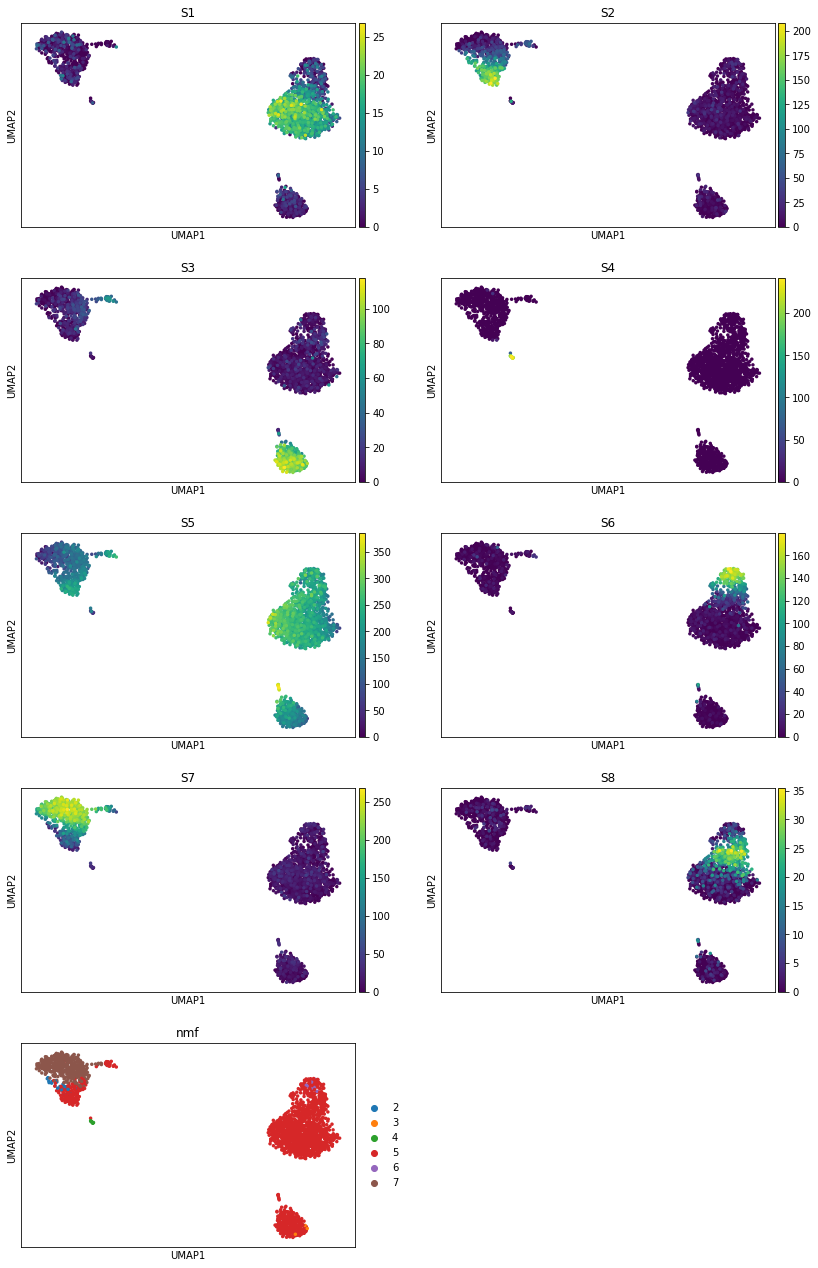

In [6]:
sc.pl.umap(adata, color=adata.uns['signatures']+['nmf'], ncols=2)

In [7]:
nmf_markers = get_uns(adata, 'nmf_markers')
nmf_markers.head()

,TCGACCTGCCGATA-1,CTCCGAACAAGTGA-1,ACCCTCGATCAAGC-1,ACTTAGCTGCGTAT-1,ATAAGTTGGTACGT-1,TTGAATGAACTACG-1,AAATTCGAGCTGAT-1,ATTACCTGGAGGAC-1,TTCACAACGTCTGA-1,TGAACCGATTCGGA-1,...,ATCAAATGAGCCTA-1,ATATGCCTAGATCC-1,ATATAGTGGAATGA-1,GGTACTGAACTCTT-1,GGTAGTACACTAGC-1,GGTAGTACGCCATA-1,GGTATCGAGACAAA-1,GGTCTAGAGAAACA-1,GGGCCAACTACGCA-1,GGTGGAGATCTCTA-1
gene,,,,,,,,,,,,,,,,,,,,,
LST1,4.627347,3.634961,5.723325,4.463426,4.409651,3.979559,3.444041,3.918368,2.758176,3.234700,...,1.590199,3.478579,2.344213,2.750371,2.951095,0.000000,0.000000,2.898412,2.705813,2.477968
AIF1,3.178456,3.242602,4.432721,4.081104,3.813597,4.198957,4.445042,3.493831,3.813597,3.835400,...,3.021577,3.628312,0.000000,3.411045,4.014231,3.642174,3.247342,3.110472,3.088754,2.855064
CST3,4.108003,4.135176,3.902176,3.631375,4.211679,3.453827,3.874403,4.477703,3.419106,4.208048,...,3.690060,4.156180,3.655847,3.560469,4.117784,4.723168,3.247342,3.959592,4.725012,3.342599
FCER1G,3.850559,3.242602,4.148992,3.781736,3.419106,3.583397,3.638888,3.795851,4.315556,3.477226,...,3.344030,3.628312,2.988211,3.021948,0.000000,2.764424,0.000000,2.898412,3.758859,2.477968
FCGR3A,2.695019,4.198714,0.000000,3.111116,2.758176,2.917652,2.672254,3.186707,3.813597,3.672264,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
nmf_genes = get_uns(adata, 'nmf_genes')
nmf_genes.head()

,1,2,3,4,5,6,7,8,max,max_id,max_norm,mean_on,mean_off,diff
index,,,,,,,,,,,,,,
LST1,0.000000,0.020289,0.000000,0.000000,4.087639e-04,0.000000,0.011632,0.0,0.020289,2.0,0.579050,3.990989,0.975019,3.015970
AIF1,0.010273,0.019958,0.000000,0.000000,2.306447e-10,0.000000,0.012353,0.0,0.019958,2.0,0.595737,3.813905,1.024863,2.789042
CST3,0.000000,0.018143,0.001112,0.005782,5.560732e-04,0.000334,0.017095,0.0,0.018143,2.0,0.658639,3.995697,1.259963,2.735734
FCER1G,0.000000,0.019698,0.000000,0.000000,0.000000e+00,0.013014,0.010982,0.0,0.019698,2.0,0.521373,3.654408,0.985909,2.668499
FCGR3A,0.000000,0.017918,0.000000,0.000000,0.000000e+00,0.015451,0.000000,0.0,0.017918,2.0,0.601781,2.911284,0.433144,2.478139
